**Hello everyone!**  

**Welcome to Colab!**

This is a cloud-based development environment designed for machine learning students and professionals. With Google Colab, you can write and run code step-by-step in Python (and also experiment with R or Julia) directly in your browser, without needing any local setup.  

Colab provides free access to GPUs and TPUs (Tensor Processing Units), making it easier to train and test deep learning models at scale. It also integrates smoothly with Google Drive, so you can save, share, and collaborate on notebooks in real time.  

Whether you’re exploring data, building models, or prototyping research ideas, Colab is a flexible and accessible tool to get started quickly.

P.S. you can use it as a text editor too! It supports the markdown format

## Let's start by importing some libraries first:

In [230]:
import torch  # the main module for PyTorch. You need to import torch to use the core features
import torch.nn as nn  # neural network building blocks
import torch.optim as optim  # optimizers (training the neural network)
import matplotlib.pyplot as plt  # visualization

## Now, let's define the training data:

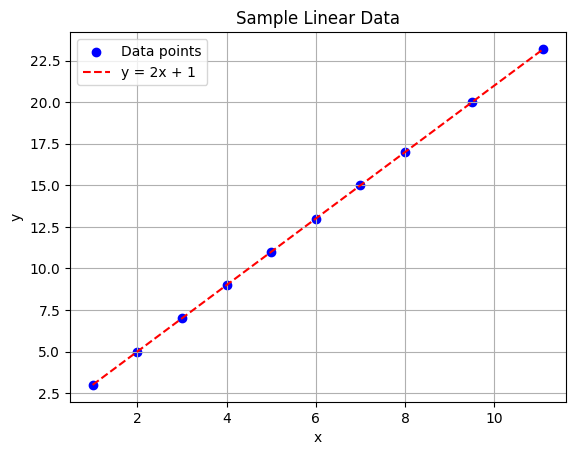

In [231]:
# Sample data: points corresponding to y = 2x + 1
x = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.5], [11.1]])
y = x*2 + 1

# Convert tensors to numpy arrays for plotting
x_np = x.numpy().flatten()
y_np = y.numpy().flatten()

# Plot
plt.scatter(x_np, y_np, color='blue', label='Data points')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()

## Let's define a model we are training (linear regression => a single input and a single output, a linear correlation is assumed):

In [232]:
# Define linear model
model = nn.Linear(1, 1)

## Let's also define the loss function and the optimizer:

In [233]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

## And now we can finally train the model!

In [234]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss and prediction every 100 epochs
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Predictions: {y_pred.detach().numpy().flatten()}, Weight: {w:.4f}, Bias: {b:.4f}")

Epoch 100, Loss: 0.2096, Predictions: [ 2.1801026  4.3095207  6.4389386  8.5683565 10.697774  12.827192
 14.956611  17.086027  20.280153  23.687223 ], Weight: 2.1288, Bias: 0.0550
Epoch 200, Loss: 0.0839, Predictions: [ 2.481281  4.563159  6.645037  8.726915 10.808793 12.890672 14.972549
 17.054426 20.177242 23.50825 ], Weight: 2.0815, Bias: 0.4021
Epoch 300, Loss: 0.0336, Predictions: [ 2.6718256  4.723627   6.775428   8.8272295 10.879031  12.930832
 14.982633  17.034433  20.112135  23.395018 ], Weight: 2.0516, Bias: 0.6218
Epoch 400, Loss: 0.0134, Predictions: [ 2.7923763  4.8251486  6.857921   8.890694  10.923466  12.956239
 14.989012  17.021784  20.070942  23.32338  ], Weight: 2.0326, Bias: 0.7607
Epoch 500, Loss: 0.0054, Predictions: [ 2.868644   4.889378   6.9101124  8.930846  10.95158   12.972315
 14.993049  17.013783  20.044884  23.278059 ], Weight: 2.0206, Bias: 0.8486
Epoch 600, Loss: 0.0022, Predictions: [ 2.9168959  4.9300137  6.9431314  8.956249  10.969367  12.982485
 14.9

## Let's see the parameters and make some predictions given this model now:

Learned weight: 2.0021, Learned bias: 0.9847
Predictions for x = 5.0 and 6.0: [[10.995114]
 [12.997206]]


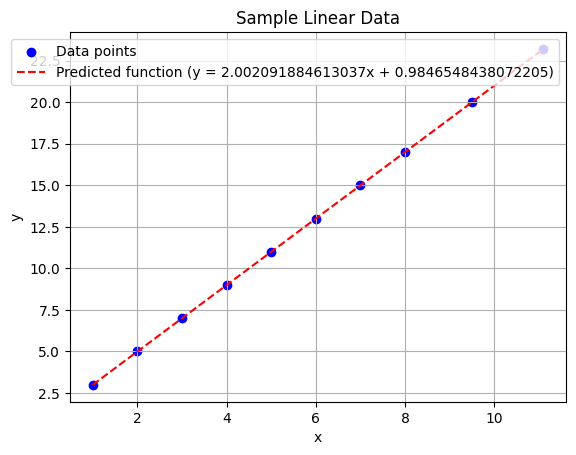

In [235]:
# Learned parameters
[w, b] = model.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Make predictions on new data
x_test = torch.tensor([[5.0], [6.0]])
y_pred_test = model(x_test)
print("Predictions for x = 5.0 and 6.0:", y_pred_test.detach().numpy())

# Plot predictions and real data
plt.scatter(x_np, y_np, color='blue', label='Data points')
plt.plot(x_np, model.weight.item()*x_np + model.bias.item(), color='red', linestyle='--', label=f'Predicted function (y = {model.weight.item()}x + {model.bias.item()})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()

## Let's see how a similar model performs given noisy data:

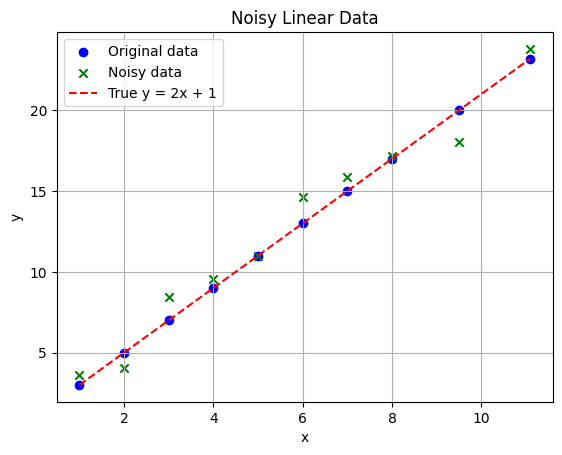

Epoch 100, Loss: 1.2818, Weight: 2.0897, Bias: 0.5263
Epoch 200, Loss: 1.1022, Weight: 2.0332, Bias: 0.9412
Epoch 300, Loss: 1.0303, Weight: 1.9974, Bias: 1.2037
Epoch 400, Loss: 1.0015, Weight: 1.9747, Bias: 1.3697
Epoch 500, Loss: 0.9900, Weight: 1.9604, Bias: 1.4748
Epoch 600, Loss: 0.9854, Weight: 1.9514, Bias: 1.5412
Epoch 700, Loss: 0.9836, Weight: 1.9456, Bias: 1.5833
Epoch 800, Loss: 0.9828, Weight: 1.9420, Bias: 1.6099
Epoch 900, Loss: 0.9825, Weight: 1.9397, Bias: 1.6267
Epoch 1000, Loss: 0.9824, Weight: 1.9383, Bias: 1.6373
Learned weight (noisy data): 1.9383, Learned bias: 1.6373


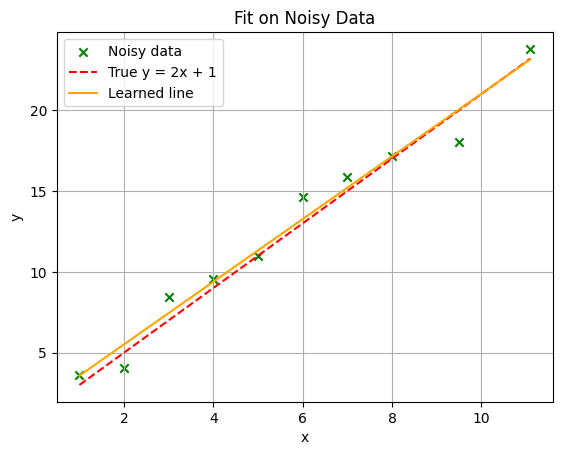

In [236]:
# ---------------------------------
# Create noisy training data
# ---------------------------------

# Original clean data: y = 2x + 1
x_noisy = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.5], [11.1]])
noise = torch.tensor(np.random.normal(0, 0.8, size=x_noisy.shape).astype(np.float32))
y_noisy = 2 * x_noisy + 1 + noise

# Convert to numpy for plotting
x_noisy_np = x_noisy.numpy().flatten()
y_noisy_np = y_noisy.numpy().flatten()

# Plot noisy data vs original
plt.scatter(x_np, y_np, color='blue', label='Original data')
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Linear Data')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------
# Retrain model on noisy data
# ---------------------------------
model_noisy = nn.Linear(1, 1)  # fresh model
criterion = nn.MSELoss()
optimizer = optim.SGD(model_noisy.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    y_pred_noisy = model_noisy(x_noisy)
    loss = criterion(y_pred_noisy, y_noisy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        [w, b] = model_noisy.parameters()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Weight: {w.item():.4f}, Bias: {b.item():.4f}")

# ---------------------------------
# Visualize learned fit on noisy data
# ---------------------------------
[w, b] = model_noisy.parameters()
print(f"Learned weight (noisy data): {w.item():.4f}, Learned bias: {b.item():.4f}")

# Plot noisy points and learned line
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.plot(x_noisy_np, (w.item()*x_noisy_np + b.item()), color='orange', label='Learned line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit on Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

## But what if we want to use a large custom dataset instead of defining something by hand in a code block?

## Step 1: mount Google Drive to Colab

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2: Extract the .tar file and list its contents
(assuming your dataset is at My Drive/Datasets/linreg.tar)

Colab runs on top of Ubuntu Linux under the hood, so you can use normal shell commands (!) in cells to manage files.

In [238]:
# make sure target directory exists
!mkdir -p /content/linreg_data

# extract tar file into that folder
!tar -xf "/content/drive/My Drive/Datasets/linreg.tar" -C /content/linreg_data

# list everything extracted
!ls -R /content/linreg_data

# explicitly search for linreg.csv
!find /content/linreg_data -name "linreg.csv"

# explicitly search for dataset.csv
!find /content/linreg_data -name "dataset.csv"

/content/linreg_data:
dataset.csv
/content/linreg_data/dataset.csv


## Step 3: load the dataset! We can use a custom class for that



In [239]:
import torch
import pandas as pd

class LinRegDataset:
    def __init__(self, csv_file):
        data = pd.read_csv(csv_file)
        # Entire columns as single tensors
        self.x = torch.tensor(data["x"].values, dtype=torch.float32).view(-1, 1)
        self.y = torch.tensor(data["y"].values, dtype=torch.float32).view(-1, 1)

    def get_all(self):
        # Return both tensors
        return self.x, self.y

# CSV path
csv_path = "/content/linreg_data/dataset.csv"

# Instantiate dataset
dataset = LinRegDataset(csv_path)

# Access full tensors
x, y = dataset.get_all()

# Quick test: print first 5 entries
print(x[:5])
print(y[:5])

tensor([[1.0139],
        [1.9525],
        [2.9775],
        [3.9723],
        [5.0236]])
tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])


## Step 4: train the model!

In [240]:
import torch
import torch.nn as nn
import torch.optim as optim

# Use the class from previous cell
dataset = LinRegDataset("/content/linreg_data/dataset.csv")
x, y = dataset.get_all()  # full tensors

print(x)
print(y)

# Define linear model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)  # let's use a much smaller learning rate because the inputs vary a lot. Alternatively, we can normalize them

epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss and prediction every 100 epochs
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Weight: {w:.4f}, Bias: {b:.4f}")

# Final parameters and predictions
print("Learned parameters:", model.weight.item(), model.bias.item())
print("Predictions:", model(x).detach().numpy())

tensor([[ 1.0139],
        [ 1.9525],
        [ 2.9775],
        [ 3.9723],
        [ 5.0236],
        [ 6.0277],
        [ 6.9847],
        [ 7.9126],
        [ 9.0416],
        [ 9.9391],
        [10.9499],
        [11.9700],
        [13.0060],
        [13.9549],
        [14.9521],
        [15.9273],
        [16.9194],
        [17.9612],
        [19.0120],
        [19.9139],
        [20.9534],
        [22.0204],
        [22.9770],
        [23.9677],
        [24.9653],
        [26.0254],
        [26.9608],
        [27.9884],
        [28.9604],
        [29.9877],
        [30.9875],
        [32.0312],
        [33.0194],
        [33.9932],
        [35.0199],
        [36.0292],
        [36.9651],
        [37.9661],
        [39.0022],
        [39.9823],
        [40.9655],
        [41.9951],
        [42.9754],
        [44.0194],
        [44.9801],
        [45.9866],
        [46.9605],
        [48.0400],
        [49.0232],
        [49.9885],
        [51.0301],
        [52.0339],
        [53.

## Step 5: visualize!

Learned weight: 2.0202, Learned bias: 0.0742
Predictions for x = 5.0 and 6.0: [[10.175409]
 [12.195654]]


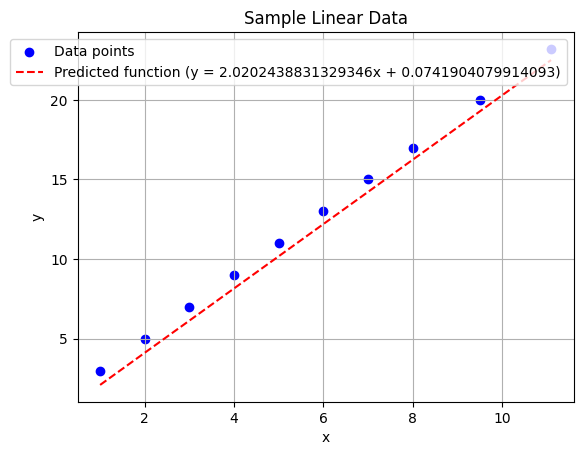

In [241]:
# Learned parameters
[w, b] = model.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Make predictions on new data
x_test = torch.tensor([[5.0], [6.0]])
y_pred_test = model(x_test)
print("Predictions for x = 5.0 and 6.0:", y_pred_test.detach().numpy())

# Plot predictions and real data
plt.scatter(x_np, y_np, color='blue', label='Data points')
plt.plot(x_np, model.weight.item()*x_np + model.bias.item(), color='red', linestyle='--', label=f'Predicted function (y = {model.weight.item()}x + {model.bias.item()})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()